Data from the Prevention of REnal and Vascular END-stage Disease (PREVEND) study, which took place in the Netherlands. The study collected various demographic and cardiovascular risk factors. This dataset is from the third survey, which participants completed in 2003-2006; data is provided for 4,095 individuals who completed cognitive testing.
https://www.openintro.org/data/index.php?data=prevend

In [1]:
library(RforHDSdata) 
suppressPackageStartupMessages(library(tidyverse))
library(broom)
suppressPackageStartupMessages(library(car))
prevend <- read.csv("prevend.csv")

In [2]:
prevend <- prevend %>% select(-c(Days, Albuminuria.2, Solubility))
prevend$Ethnicity <- as.factor(prevend$Ethnicity)
prevend$Education <- as.factor(prevend$Education)

In [3]:
set.seed(5)
train_ids <- sample(1:nrow(prevend), floor(0.75*nrow(prevend)), 
                    replace=FALSE)
prevend_test <- prevend[-train_ids, ]
prevend <- prevend[train_ids, ]

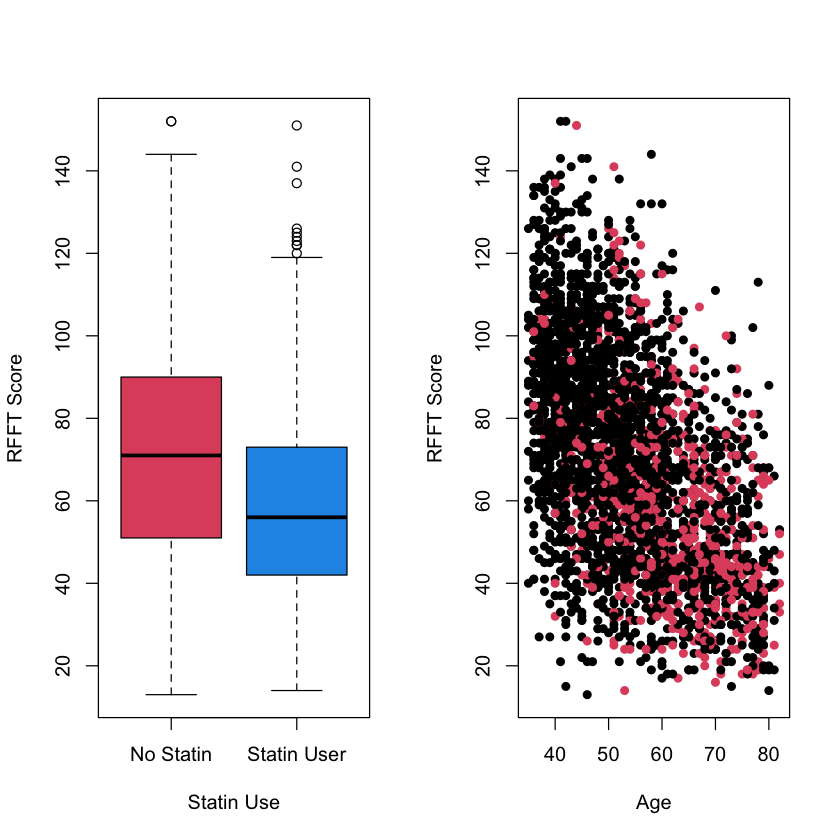

In [4]:
par(mfrow=c(1,2))

boxplot(prevend$RFFT~prevend$Statin, 
        names=c("No Statin","Statin User"),
        xlab="Statin Use",ylab="RFFT Score",col=c(2,4))

plot(prevend$Age, prevend$RFFT, pch=16, col = factor(prevend$Statin),
     xlab="Age",ylab="RFFT Score")

In [6]:
mod_simp <- lm(RFFT~Statin, data = prevend)

In [7]:
summary(mod_simp)


Call:
lm(formula = RFFT ~ Statin, data = prevend)

Residuals:
    Min      1Q  Median      3Q     Max 
-58.570 -19.570  -0.709  17.430  92.291 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.5700     0.5199  137.66   <2e-16 ***
Statin      -12.8605     1.1008  -11.68   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.4 on 3069 degrees of freedom
Multiple R-squared:  0.04258,	Adjusted R-squared:  0.04227 
F-statistic: 136.5 on 1 and 3069 DF,  p-value: < 2.2e-16


In [12]:
sum_mod_simp <- summary(mod_simp)
names(sum_mod_simp)

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

In [15]:
mod_adj <- lm(RFFT~Statin+Age, data = prevend)

In [27]:
mod_inter <- lm(RFFT~Statin+Age+Age:Statin, data = prevend)
summary(mod_inter)


Call:
lm(formula = RFFT ~ Statin + Age + Age:Statin, data = prevend)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.966 -15.534  -0.903  14.580  78.242 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 131.76261    2.17692  60.527   <2e-16 ***
Statin      -13.74425    5.48029  -2.508   0.0122 *  
Age          -1.13800    0.04025 -28.274   <2e-16 ***
Statin:Age    0.16314    0.09088   1.795   0.0727 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.22 on 3067 degrees of freedom
Multiple R-squared:  0.2677,	Adjusted R-squared:  0.2669 
F-statistic: 373.6 on 3 and 3067 DF,  p-value: < 2.2e-16


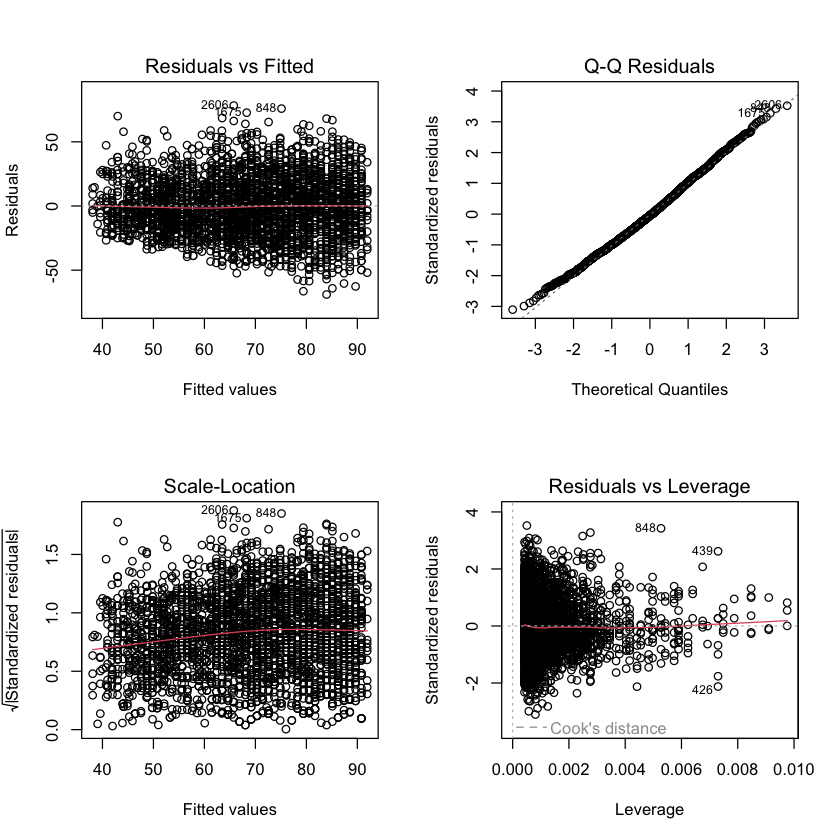

In [28]:
par(mfrow=c(2,2))
plot(mod_inter)

In [30]:
mod_all <- lm(RFFT ~ . - Casenr - PS - PSquint - Match_1 - Match_2 - VAT,
             data=prevend)
vif(mod_all)

,GVIF,Df,GVIF^(1/(2*Df))
Age,3.426183,1,1.850995
Gender,1.588895,1,1.260514
Ethnicity,1.044927,3,1.007351
Education,1.291220,3,1.043518
CVD,1.254282,1,1.119948
DM,1.286776,1,1.134361
Smoking,1.447040,1,1.202930
Hypertension,2.049773,1,1.431703
BMI,1.282589,1,1.132515
SBP,11.081016,1,3.328816


In [32]:
mod_step <- step(mod_all, direction="backward", trace=0,
                scope = list(lower="RFFT~Statin"))

In [33]:
summary(mod_step)


Call:
lm(formula = RFFT ~ Age + Ethnicity + Education + CVD + DM + 
    Smoking + BMI + Albuminuria.1 + HDL + Statin, data = prevend)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.703 -14.299  -1.092  13.408  84.839 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   108.74409    3.92041  27.738  < 2e-16 ***
Age            -0.88374    0.03669 -24.087  < 2e-16 ***
Ethnicity1    -21.44166    4.51611  -4.748 2.15e-06 ***
Ethnicity2    -12.72611    2.72900  -4.663 3.25e-06 ***
Ethnicity3     -7.89342    4.30034  -1.836 0.066524 .  
Education1      5.38511    1.38281   3.894 0.000101 ***
Education2     12.20875    1.43807   8.490  < 2e-16 ***
Education3     22.03541    1.43771  15.327  < 2e-16 ***
CVD            -2.23102    1.53236  -1.456 0.145513    
DM             -4.30219    1.62502  -2.647 0.008151 ** 
Smoking        -2.37482    0.86752  -2.737 0.006227 ** 
BMI            -0.17203    0.09159  -1.878 0.060455 .  
Albuminuria.1  -1.76244    1

In [34]:
vif(mod_step)

,GVIF,Df,GVIF^(1/(2*Df))
Age,1.320112,1,1.148961
Ethnicity,1.020259,3,1.003348
Education,1.253153,3,1.038327
CVD,1.158738,1,1.076447
DM,1.156901,1,1.075594
Smoking,1.062962,1,1.031000
BMI,1.166674,1,1.080127
Albuminuria.1,1.122435,1,1.059451
HDL,1.100447,1,1.049022
Statin,1.299526,1,1.139967


In [38]:
tidy(mod_step, conf.int = TRUE)[, -c(3,4)]

term,estimate,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),108.7440863,3.104802e-151,101.0571871,116.430985433
Age,-0.8837438,1.603329e-117,-0.9556828,-0.811804786
Ethnicity1,-21.4416617,2.150866e-06,-30.2965855,-12.586737973
Ethnicity2,-12.7261100,3.245380e-06,-18.0769668,-7.375253199
Ethnicity3,-7.8934150,6.652390e-02,-16.3252658,0.538435818
Education1,5.3851135,1.005847e-04,2.6737730,8.096453923
Education2,12.2087459,3.185024e-17,9.3890683,15.028423493
Education3,22.0354094,3.858561e-51,19.2164315,24.854387309
CVD,-2.2310209,1.455132e-01,-5.2355863,0.773544402


In [40]:
inf_mat <- as.data.frame(influence.measures(mod_step)[['infmat']])
head(inf_mat)

,dfb.1_,dfb.Age,dfb.Eth1,dfb.Eth2,dfb.Eth3,dfb.Edc1,dfb.Edc2,dfb.Edc3,dfb.CVD,dfb.DM,dfb.Smkn,dfb.BMI,dfb.Al.1,dfb.HDL,dfb.Sttn,dffit,cov.r,cook.d,hat
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
834,-0.03103565,0.020890447,0.0019407004,3.562942e-03,0.0012911624,0.039853606,0.042450777,0.043374502,0.002288746,0.005000488,1.290593e-02,-0.002481010,0.005204954,0.015893457,0.003583560,-0.05428075,1.0073928,1.964547e-04,0.005206632
3947,0.02358650,0.050498342,0.0002426295,-2.243071e-03,0.0004033619,-0.078393300,-0.071817975,-0.074399352,-0.015770466,-0.014288654,-1.700834e-02,-0.023443692,-0.021335528,-0.011350200,-0.017145162,0.11350327,0.9976928,8.584412e-04,0.005100763
2745,-0.02360428,0.028071239,0.0009166563,-5.923907e-05,-0.0014199918,0.000495327,0.003173217,0.025649918,-0.003061102,0.001251144,-6.253804e-03,-0.004725251,-0.008412103,0.037615648,-0.009952361,0.07683677,0.9905313,3.932962e-04,0.001784247
2255,-0.01140915,-0.008568144,-0.0072994556,-5.236043e-03,-0.0063827241,0.033122428,-0.006944361,-0.012181201,-0.001122803,0.002086657,-2.393900e-02,0.005318013,-0.007574898,0.051286466,-0.018994256,0.09988776,0.9835713,6.643448e-04,0.002074232
2763,0.01555505,-0.001751148,0.0002126741,2.729178e-04,0.0005000001,-0.001789897,-0.002919261,-0.009399776,0.001815469,0.003827282,1.404359e-05,-0.019055763,-0.016864188,-0.004588854,0.006639691,-0.02961827,1.0101579,5.849912e-05,0.005905087
889,-0.03948953,-0.026086587,-0.0028877512,-8.688016e-04,-0.0025293628,0.016249787,0.003211353,0.009271777,0.056182719,-0.002553964,2.819669e-02,0.074599228,-0.009092826,0.009648996,-0.026806170,0.10232670,1.0195037,6.981420e-04,0.017195306


In [42]:
max(abs(inf_mat$dfb.Sttn))
which.max(abs(inf_mat$dfb.Sttn))

[1] 0.1868862

[1] 355

In [43]:
prevend_sub <- prevend[-which.max(abs(inf_mat$dfb.Sttn)), ]

lm(formula = RFFT ~ Age + Ethnicity + Education + CVD + DM + 
    Smoking + BMI + Albuminuria.1 + HDL + Statin, data = prevend_sub)


Call:
lm(formula = RFFT ~ Age + Ethnicity + Education + CVD + DM + 
    Smoking + BMI + Albuminuria.1 + HDL + Statin, data = prevend_sub)

Coefficients:
  (Intercept)            Age     Ethnicity1     Ethnicity2     Ethnicity3  
     108.0554        -0.8785       -21.4012       -12.6642        -7.8518  
   Education1     Education2     Education3            CVD             DM  
       5.7034        12.5515        22.3809        -2.1302        -4.1902  
      Smoking            BMI  Albuminuria.1            HDL         Statin  
      -2.3101        -0.1724        -1.7027         1.7226        -0.5770  


In [44]:
pred_test <- predict(mod_step, newdata=prevend_test)
mean(abs(pred_test - prevend_test$RFFT))

[1] 16.37226